In [1]:
from google.colab import files
uploaded = files.upload()

Saving auto-mpg.csv to auto-mpg.csv


ABHISHEK J 24BAD002


/tmp/ipython-input-824348094.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(df['horsepower'].median(), inplace=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.war

Degree 2: MSE=13.94115894036442, RMSE=3.733786140148418, R2=0.7407089260880413
Degree 3: MSE=13.98754305379455, RMSE=3.7399923868631806, R2=0.7398462297630657
Degree 4: MSE=14.443392221902418, RMSE=3.8004463187765745, R2=0.73136790878228
Ridge R²: 0.7408954599024056


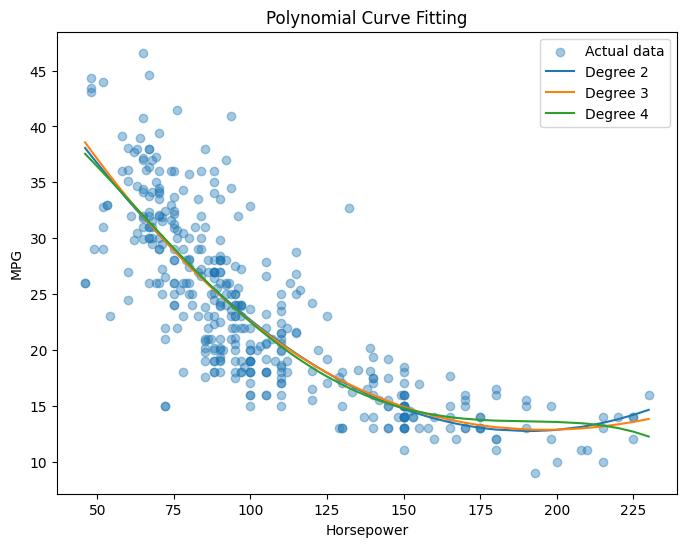

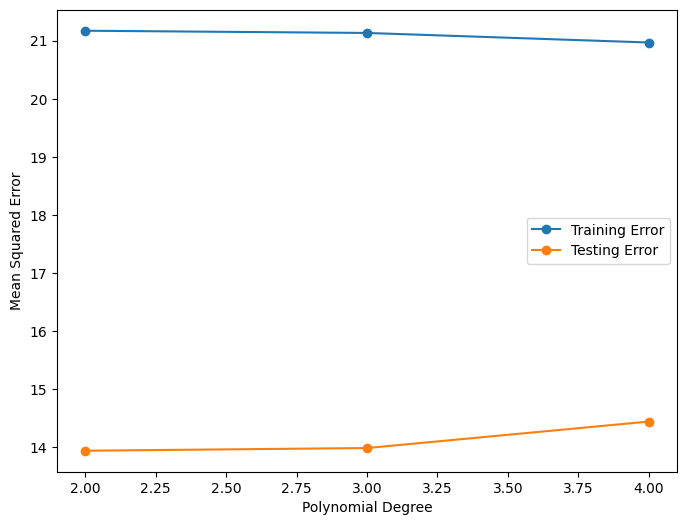

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


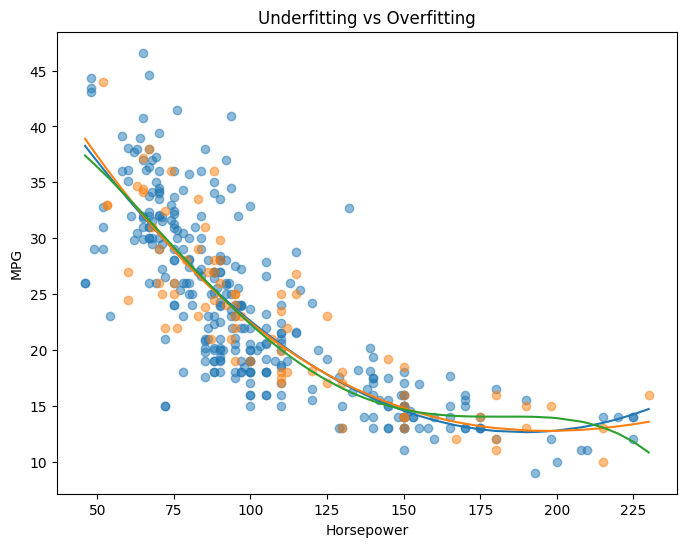

In [2]:
print("ABHISHEK J 24BAD002")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("auto-mpg.csv")

df['horsepower'] = df['horsepower'].replace('?', np.nan)
df['horsepower'] = df['horsepower'].astype(float)
df['horsepower'].fillna(df['horsepower'].median(), inplace=True)

X = df[['horsepower']]
y = df['mpg']

degrees = [2, 3, 4]

poly_features = {}
for d in degrees:
    poly = PolynomialFeatures(degree=d)
    poly_features[d] = poly.fit_transform(X)

X_scaled = {}
scaler = StandardScaler()
for d in degrees:
    X_scaled[d] = scaler.fit_transform(poly_features[d])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

results = {}
for d in degrees:
    Xtr, Xte, ytr, yte = train_test_split(
        X_scaled[d], y, test_size=0.2, random_state=42
    )

    model = LinearRegression()
    model.fit(Xtr, ytr)

    y_pred = model.predict(Xte)

    results[d] = {
        "MSE": mean_squared_error(yte, y_pred),
        "RMSE": np.sqrt(mean_squared_error(yte, y_pred)),
        "R2": r2_score(yte, y_pred)
    }

for d in degrees:
    print(
        f"Degree {d}: "
        f"MSE={results[d]['MSE']}, "
        f"RMSE={results[d]['RMSE']}, "
        f"R2={results[d]['R2']}"
    )

ridge = Ridge(alpha=1.0)
ridge.fit(Xtr, ytr)
ridge_pred = ridge.predict(Xte)
print("Ridge R²:", r2_score(yte, ridge_pred))

X_sorted = np.sort(X.values, axis=0)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.4, label="Actual data")

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X)
    X_sorted_poly = poly.transform(X_sorted)

    scaler = StandardScaler()
    X_poly_scaled = scaler.fit_transform(X_poly)
    X_sorted_scaled = scaler.transform(X_sorted_poly)

    model = LinearRegression()
    model.fit(X_poly_scaled, y)

    y_curve = model.predict(X_sorted_scaled)
    plt.plot(X_sorted, y_curve, label=f"Degree {d}")

plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Polynomial Curve Fitting")
plt.legend()
plt.show()

train_errors = []
test_errors = []

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_poly)
    X_test_scaled = scaler.transform(X_test_poly)

    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

plt.figure(figsize=(8, 6))
plt.plot(degrees, train_errors, marker='o', label="Training Error")
plt.plot(degrees, test_errors, marker='o', label="Testing Error")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()

demo_degrees = [degrees[0], degrees[len(degrees)//2], degrees[-1]]

plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, alpha=0.5)
plt.scatter(X_test, y_test, alpha=0.5)

for d in demo_degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_sorted_poly = poly.transform(X_sorted)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_poly)
    X_sorted_scaled = scaler.transform(X_sorted_poly)

    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    y_curve = model.predict(X_sorted_scaled)
    plt.plot(X_sorted, y_curve)

plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Underfitting vs Overfitting")
plt.show()